In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance

# **Multivariat Assignment 1**

Task 1.1 - Create a true modell

Text(0.5, 1.0, 'Real model!!')

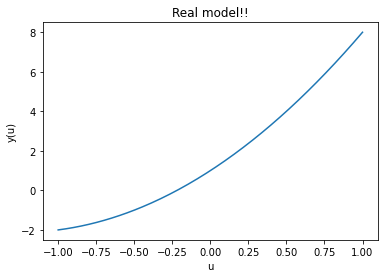

In [2]:
def arbitrary_poly(params):
    poly_model = lambda x: sum([p*(x**i) for i, p in enumerate(params)])
    return poly_model

theta = [1,5,2] # The real parameters of the true model

ymod = arbitrary_poly(theta) 

N = 200 # Number of measurements

u = np.linspace(-1,1,N) # "Measured" inputs.

yreal = ymod(u) # Create the modell


# Plot
plt.figure()
plt.plot(u,yreal)
plt.xlabel('u')
plt.ylabel('y(u)')
plt.title('Real model!!')

Task 1.2 - Generate noise signal

In [3]:
def chooseDist(dist1,dist2,alpha): # Choose distribution given alpha to be probability of distribution 1.
    if(random.randint(0,1)>(1-alpha)):
        return dist1
    return dist2

from scipy.stats import norm, laplace

def genNoise(alpha, N, mean, sigma, beta, magnitude): # Generate the noise of the signal
    e = np.zeros(N)
    for i in range(0,N):
        dist = chooseDist("Gauss","Laplace",alpha)
        if dist == "Laplace":
            #pdf = laplace_pdf
            pdf = laplace.pdf
            e[i] = magnitude * np.random.laplace(mean, beta)
        elif dist == "Gauss":
            #pdf = gauss_pdf
            pdf = norm.pdf
            e[i] = magnitude * np.random.normal(mean, sigma)
        else:
            raise Exception("Distribution not implemented, choose \"laplace\" or \"gauss\"")
    
    return e

In [4]:
mean = 0

magnitude = 1

In [5]:
alpha = 0.1

sigma = 1

beta = 1

e = genNoise(alpha, N, mean, sigma, beta, magnitude)

y = yreal + e

Task 1.3 - Algorithm for Least Square Estimation

In [6]:
# Matrix form
u_tensor_0 = np.reshape(u,(N,1))

ones_vec = np.ones((N,1))
u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

for i in range(2,len(theta)):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)

Want to find $(u^T\cdot u)^{-1}$

In [7]:
u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)

u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u)

Next step is to find $(u^T\cdot y)$

In [8]:
u_transpose_dot_y = np.dot(u_tensor.T,y)

Now to the last, final, shit show of a step!!!! $\hat{\theta} = (u^T\cdot u)^{-1}\cdot(u^T\cdot y)$

0.27514443053309745


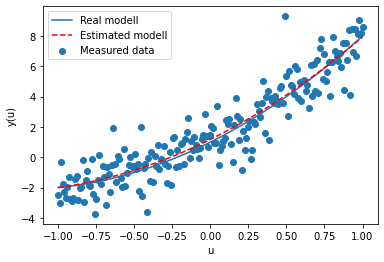

In [9]:
est_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y) # Calculate equation

est_params = est_params.tolist() # Format parameters to list

d = distance.euclidean(theta, est_params)

print(d)

y_est = arbitrary_poly(est_params) # Create estimated response

plt.figure()
plt.plot(u,yreal,label = "Real modell")
plt.scatter(u,y, label = "Measured data")
plt.plot(u,y_est(u),"r--",label = "Estimated modell")
plt.ylabel('y(u)')
plt.xlabel('u')
plt.legend()

Task 1.4 - Analysis of parameters

Analysis of $d$ when $\alpha = 1$ and $\sigma$ is varying.

Text(0, 0.5, 'd')

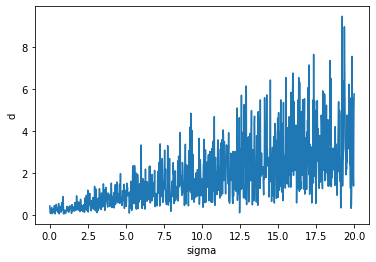

In [10]:
alpha = 1

sigma_space = np.linspace(0,20,1000)

beta = 1

e = np.array([genNoise(alpha, N, mean, sigma, beta, magnitude) for sigma in sigma_space])

y = yreal + e

u_transpose_dot_y = np.array([np.dot(u_tensor.T,y_i) for y_i in y])

est_params = np.array([np.dot(u_transpose_dot_u_inv,elt) for elt in u_transpose_dot_y]) # Calculate equation

est_params = est_params.tolist() # Format parameters to list

d = np.array([distance.euclidean(theta, elt) for elt in est_params])

plt.figure()
plt.plot(sigma_space,d)
plt.xlabel('sigma')
plt.ylabel('d')

Comment: We observe that increasing $\sigma$ will result in increasing variance of the distance d. That is, higher peaks.

Analysis when $\alpha = 0$ and $\beta$ varying.

Text(0, 0.5, 'd')

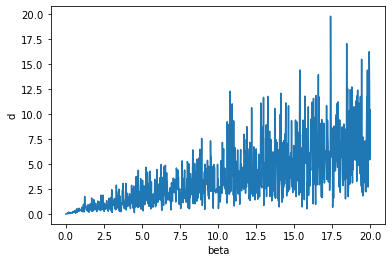

In [11]:
alpha = 0

beta_space = np.linspace(0,20,1000)

sigma = 1

e = np.array([genNoise(alpha, N, mean, sigma, beta, magnitude) for beta in beta_space])

y = yreal + e

u_transpose_dot_y = np.array([np.dot(u_tensor.T,y_i) for y_i in y])

est_params = np.array([np.dot(u_transpose_dot_u_inv,elt) for elt in u_transpose_dot_y]) # Calculate equation

est_params = est_params.tolist() # Format parameters to list

d = np.array([distance.euclidean(theta, elt) for elt in est_params])

plt.figure()
plt.plot(beta_space,d)
plt.xlabel('beta')
plt.ylabel('d')

Comment: We observe somewhat the same result as for varying $\sigma$, but with more increasing variance of the value d. It also looks like the mean of d is increasing.

Text(0, 0.5, 'd')

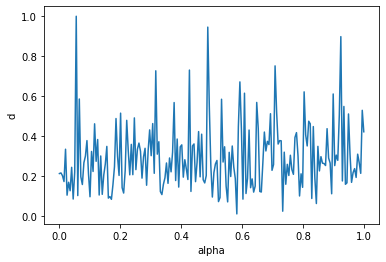

In [12]:
alpha_space = np.linspace(0,1,N)

beta = 1

sigma = 1

e = np.array([genNoise(alpha, N, mean, sigma, beta, magnitude) for alpha in alpha_space])

y = yreal + e

u_transpose_dot_y = np.array([np.dot(u_tensor.T,y_i) for y_i in y])

est_params = np.array([np.dot(u_transpose_dot_u_inv,elt) for elt in u_transpose_dot_y]) # Calculate equation

est_params = est_params.tolist() # Format parameters to list

d = np.array([distance.euclidean(theta, elt) for elt in est_params])

plt.figure()
plt.plot(alpha_space,d)
plt.xlabel('alpha')
plt.ylabel('d')

Observation: When the two distributions have equal variance, the weighting of their contribution has little effect on the distance d.